In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle

In [2]:
data = pd.read_csv('../data/zomato.csv', encoding='latin-1')

In [3]:
data.head()

,Restaurant ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.columns

Index(['Restaurant ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
data.drop(columns = ['Restaurant ID', 'Restaurant_Name', 'Address', 'Locality Verbose', 'Longitude', 'Latitude', 'Has Online delivery', 'Switch to order menu', 'Rating color', 'Rating text'], inplace = True)

In [6]:
data.columns

Index(['Country_Code', 'City', 'Locality', 'Cuisines', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Votes'],
      dtype='object')

In [7]:
def func(x):
    return x.split("(")[0]

data['Currency'] = data['Currency'].map(func)

In [8]:
data.head()

,Country_Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Is delivering now,Price range,Aggregate rating,Votes
0,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula,Yes,No,3,4.8,314
1,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula,Yes,No,3,4.5,591
2,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula,Yes,No,4,4.4,270
3,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula,No,No,4,4.9,365
4,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula,Yes,No,4,4.8,229


In [9]:
data['Country_Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

In [10]:
data['Currency'].value_counts()

Indian Rupees        8652
Dollar                482
Pounds                 80
Brazilian Real         60
Emirati Diram          60
Rand                   60
NewZealand             40
Turkish Lira           34
Botswana Pula          22
Indonesian Rupiah      21
Qatari Rial            20
Sri Lankan Rupee       20
Name: Currency, dtype: int64

In [11]:
data.isnull().sum()

Country_Code            0
City                    0
Locality                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Is delivering now       0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64

In [12]:
data['Cuisines'].fillna(data['Cuisines'].mode()[0], inplace = True)

In [13]:
data.isnull().sum()

Country_Code            0
City                    0
Locality                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Is delivering now       0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64

In [14]:
country = {
    "Philippines": 162,
    "Brazil": 30,
    "United States": 216,
    "Australia": 14,
    "Canada": 37,
    "Singapore": 184,
    "UAE": 214,
    "India": 1,
    "Indonesia": 94,
    "New Zealand": 148,
    "England": 215,
    "Qatar": 166,
    "South Africa": 189,
    "Sri Lanka": 191,
    "Turkey": 208
}


In [15]:
currency_values = {
    'Botswana Pula': 0.090,
    'Brazilian Real': 0.20,
    'Dollar': 1.00,
    'Emirati Dirham': 0.27,
    'Emirati Diram': 0.27,
    'Indian Rupees': 0.014,
    'Indonesian Rupiah': 0.000071,
    'NewZealand': 0.70,
    'Pounds': 1.39,
    'Qatari Rial': 0.27,
    'Rand': 0.070,
    'Sri Lankan Rupee': 0.0050,
    'Turkish Lira': 0.12
}

In [16]:
data['Currency'] = data['Currency'].map(currency_values)

In [17]:
data.isnull().sum()

Country_Code            0
City                    0
Locality                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Is delivering now       0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64

In [18]:
data['Cost'] = data['Currency'] * data['Average Cost for two']

In [19]:
data.head()

,Country_Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Is delivering now,Price range,Aggregate rating,Votes,Cost
0,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,0.09,Yes,No,3,4.8,314,99.0
1,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,0.09,Yes,No,3,4.5,591,108.0
2,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,0.09,Yes,No,4,4.4,270,360.0
3,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,0.09,No,No,4,4.9,365,135.0
4,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,0.09,Yes,No,4,4.8,229,135.0


In [20]:
data.drop(columns = ['Average Cost for two', 'Currency'], inplace = True)

In [21]:
data.columns

Index(['Country_Code', 'City', 'Locality', 'Cuisines', 'Has Table booking',
       'Is delivering now', 'Price range', 'Aggregate rating', 'Votes',
       'Cost'],
      dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
data['Has Table booking'] = le.fit_transform(data['Has Table booking'])
data['Is delivering now'] = le.fit_transform(data['Is delivering now'])

In [25]:
data['Is delivering now'].value_counts()

0    9517
1      34
Name: Is delivering now, dtype: int64

In [26]:
data['Has Table booking'].value_counts()

0    8393
1    1158
Name: Has Table booking, dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country_Code       9551 non-null   int64  
 1   City               9551 non-null   object 
 2   Locality           9551 non-null   object 
 3   Cuisines           9551 non-null   object 
 4   Has Table booking  9551 non-null   int32  
 5   Is delivering now  9551 non-null   int32  
 6   Price range        9551 non-null   int64  
 7   Aggregate rating   9551 non-null   float64
 8   Votes              9551 non-null   int64  
 9   Cost               9551 non-null   float64
dtypes: float64(2), int32(2), int64(3), object(3)
memory usage: 671.7+ KB


In [28]:
data.head()

,Country_Code,City,Locality,Cuisines,Has Table booking,Is delivering now,Price range,Aggregate rating,Votes,Cost
0,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1,0,3,4.8,314,99.0
1,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1,0,3,4.5,591,108.0
2,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",1,0,4,4.4,270,360.0
3,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",0,0,4,4.9,365,135.0
4,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1,0,4,4.8,229,135.0


In [29]:
country_code = data['Country_Code'].unique()

In [30]:
country_code

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

In [32]:
country_city = {}

In [33]:
for i in country:
    country_city[i] = data[data['Country_Code'] == country[i]]['City'].unique().tolist()

In [34]:
with open('../countryCity.pkl','wb') as file:
    pickle.dump(country_city, file)

In [35]:
with open('../countryCode.pkl', 'wb') as file:
    pickle.dump(country, file)

In [36]:
city_locality = {}

In [37]:
for i in data['City'].unique():
    city_locality[i] = data[data['City'] == i]['Locality'].unique().tolist()

In [38]:
with open('../cityLocality.pkl', 'wb') as file:
    pickle.dump(city_locality, file)

In [39]:
city_mapping = {}
idx = 0
for i in data['City'].unique():
    city_mapping[str(i)] = idx
    idx += 1

In [40]:
with open('../city.pkl', 'wb') as file:
    pickle.dump(city_mapping, file)

In [41]:
data['City'] = data['City'].map(city_mapping)

In [42]:
data.head()

,Country_Code,City,Locality,Cuisines,Has Table booking,Is delivering now,Price range,Aggregate rating,Votes,Cost
0,162,0,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1,0,3,4.8,314,99.0
1,162,0,"Little Tokyo, Legaspi Village, Makati City",Japanese,1,0,3,4.5,591,108.0
2,162,1,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",1,0,4,4.4,270,360.0
3,162,1,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",0,0,4,4.9,365,135.0
4,162,1,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1,0,4,4.8,229,135.0


In [43]:
locality_cuisine = {}

for i in data['Locality']:
    locality_cuisine[i] = data[data['Locality'] == i]['Cuisines'].unique().tolist()

In [44]:
with open('../localityCuisine.pkl', 'wb') as file:
    pickle.dump(locality_cuisine, file)

In [45]:
import json

cuisines_mapping = {}
temp = {}
idx = 0
for i in data['Cuisines'].unique():
    key = json.dumps(i)
    temp[key] = idx
    cuisines_mapping[i] = idx
    idx += 1

In [46]:
with open('../cuisine.pkl','wb') as file:
    pickle.dump(cuisines_mapping, file)

In [47]:
data['Cuisines'] = data['Cuisines'].map(cuisines_mapping)

In [48]:
data.head()

,Country_Code,City,Locality,Cuisines,Has Table booking,Is delivering now,Price range,Aggregate rating,Votes,Cost
0,162,0,"Century City Mall, Poblacion, Makati City",0,1,0,3,4.8,314,99.0
1,162,0,"Little Tokyo, Legaspi Village, Makati City",1,1,0,3,4.5,591,108.0
2,162,1,"Edsa Shangri-La, Ortigas, Mandaluyong City",2,1,0,4,4.4,270,360.0
3,162,1,"SM Megamall, Ortigas, Mandaluyong City",3,0,0,4,4.9,365,135.0
4,162,1,"SM Megamall, Ortigas, Mandaluyong City",4,1,0,4,4.8,229,135.0


In [49]:
locality_mapping = {}
idx = 0

for i in data['Locality'].unique():
    locality_mapping[i] = idx
    idx += 1

In [50]:
data['Locality'] = data['Locality'].map(locality_mapping)

In [51]:
data.head()

,Country_Code,City,Locality,Cuisines,Has Table booking,Is delivering now,Price range,Aggregate rating,Votes,Cost
0,162,0,0,0,1,0,3,4.8,314,99.0
1,162,0,1,1,1,0,3,4.5,591,108.0
2,162,1,2,2,1,0,4,4.4,270,360.0
3,162,1,3,3,0,0,4,4.9,365,135.0
4,162,1,3,4,1,0,4,4.8,229,135.0


In [52]:
with open('../locality.pkl', 'wb') as file:
    pickle.dump(locality_mapping, file)

In [53]:
data.head()

,Country_Code,City,Locality,Cuisines,Has Table booking,Is delivering now,Price range,Aggregate rating,Votes,Cost
0,162,0,0,0,1,0,3,4.8,314,99.0
1,162,0,1,1,1,0,3,4.5,591,108.0
2,162,1,2,2,1,0,4,4.4,270,360.0
3,162,1,3,3,0,0,4,4.9,365,135.0
4,162,1,3,4,1,0,4,4.8,229,135.0


In [54]:
data['Votes'].describe()

count     9551.000000
mean       156.909748
std        430.169145
min          0.000000
25%          5.000000
50%         31.000000
75%        131.000000
max      10934.000000
Name: Votes, dtype: float64

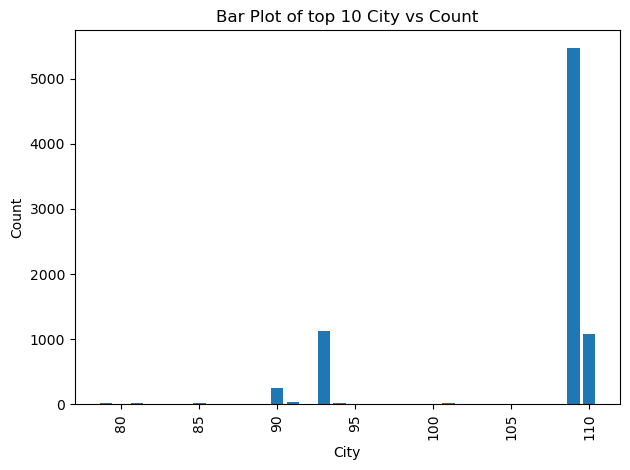

In [55]:
city = "City"
city_count = data[city].value_counts()

top_10_cities = city_count.nlargest(10)

plt.bar(top_10_cities.index, top_10_cities.values)


plt.xlabel(city)
plt.ylabel('Count')
plt.title('Bar Plot of top 10 ' + city + ' vs Count')



# Rotate x-axis labels if needed
plt.xticks(rotation=90)

plt.tight_layout()

# Show the plot
plt.show()

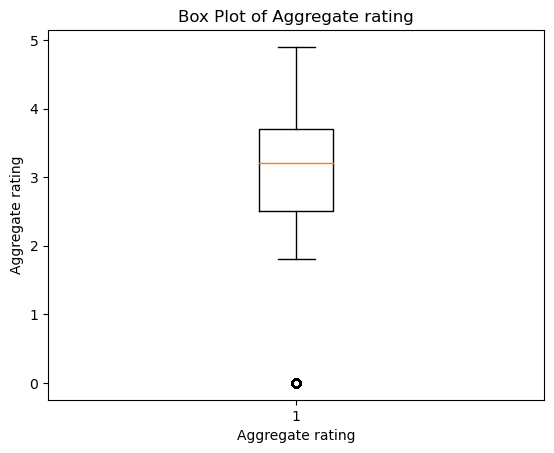

In [58]:
column_name = 'Aggregate rating'

# Create the box plot
plt.boxplot(data[column_name])

# Set labels and title
plt.xlabel(column_name)
plt.ylabel('Aggregate rating')
plt.title('Box Plot of ' + column_name)

# Show the plot
plt.show()

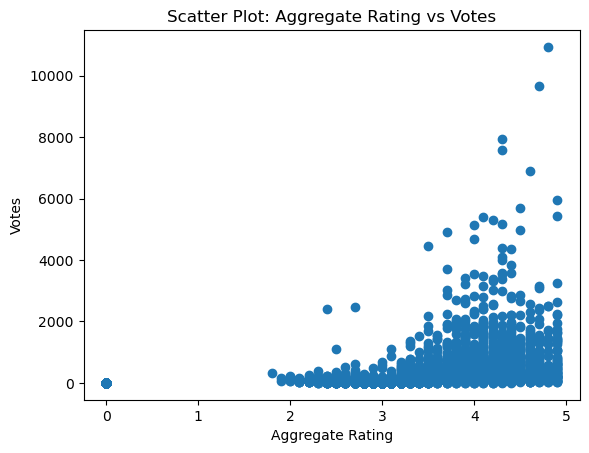

In [59]:
plt.scatter(data['Aggregate rating'], data['Votes'])

# Set labels and title
plt.xlabel('Aggregate Rating')
plt.ylabel('Votes')
plt.title('Scatter Plot: Aggregate Rating vs Votes')

# Show the plot
plt.show()

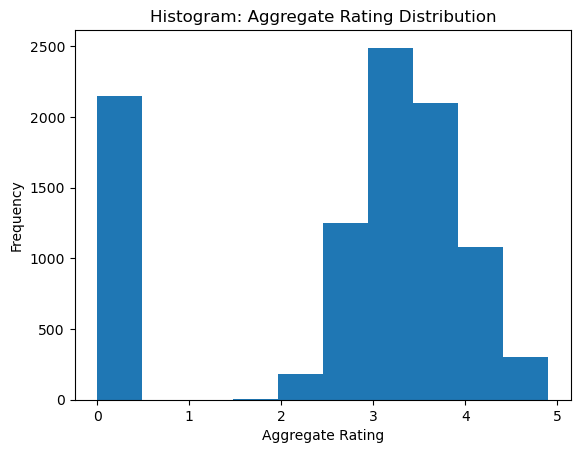

In [60]:
plt.hist(data['Aggregate rating'], bins=10)

# Set labels and title
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.title('Histogram: Aggregate Rating Distribution')

# Show the plot
plt.show()

In [73]:
x = data.drop(columns = ['Cost'])

In [74]:
y = data['Cost']

In [75]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_normalized = scaler.fit_transform(x)

x = pd.DataFrame(x_normalized, columns=x.columns)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)

In [78]:
y_train.head()

3721    26.6
2200     4.2
2220     2.8
5868     4.9
8878    14.0
Name: Cost, dtype: float64

In [79]:
x_train.head()

,Country_Code,City,Locality,Cuisines,Has Table booking,Is delivering now,Price range,Aggregate rating,Votes
3721,0.0,0.778571,0.586578,0.190789,1.0,0.0,0.666667,0.673469,0.013536
2200,0.0,0.664286,0.410936,0.033443,0.0,0.0,0.000000,0.000000,0.000000
2220,0.0,0.664286,0.410936,0.033443,0.0,0.0,0.000000,0.000000,0.000000
5868,0.0,0.778571,0.654515,0.586623,0.0,0.0,0.000000,0.693878,0.007682
8878,0.0,0.785714,0.775476,0.007675,0.0,0.0,0.666667,0.632653,0.013444


In [80]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

r2_score(y_test, y_pred)

0.4707525795072077

In [81]:
#Decision Tree

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

r2_score(y_test, y_pred)

0.2852162164878391

In [82]:
#Decision Tree Hypertuning

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

regressor1 = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(regressor1, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

best_regressor1 = DecisionTreeRegressor(**best_params)
best_regressor1.fit(x_train, y_train)

y_pred = best_regressor1.predict(x_test)

r2_score(y_test, y_pred)

0.8216955710930733

In [83]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

y_pred = rf_reg.predict(x_test)

r2_score(y_test, y_pred)

0.7933179001395876

In [77]:
#Random Forest Hypertuned

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()

rf = GridSearchCV(rf, param_grid, cv=5)
rf.fit(x_train, y_train)

best_params = rf.best_params_

y_pred = rf.predict(x_test)

r2_score(y_test, y_pred)

0.816666087429193

In [79]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor()

gb_reg.fit(x_train, y_train)
y_pred = gb_reg.predict(x_test)

r2_score(y_test, y_pred)

0.7993026318669006

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gb_model = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(gb_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

predictions = best_model.predict(x_test)
r2_score(predictions, y_test)

0.7253946854573383

In [88]:
from sklearn.ensemble import VotingRegressor

voting_regressor = VotingRegressor(estimators=[('dt', best_regressor1), ('rf', rf), ('gb', best_model)])

voting_regressor.fit(x_train, y_train)

predictions = voting_regressor.predict(x_test)

r2_score(y_test, predictions)

0.8384490281720753

In [89]:
path = '../model.pkl'

In [90]:
import pickle

In [91]:
with open(path, 'wb') as file:
    pickle.dump(voting_regressor, file)